# Exoplanet Classification

#### 🔶 Colab Content

In [ ]:
#!pip install tensorflow gpu

In [ ]:
#!nvidia-smi

In [ ]:
'''from google.colab import drive
drive.mount("/content/gdrive")'''

In [4]:
'''import pandas as pd
import numpy as np
import matplotlib.pyplot as plt'''

'import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt'

In [5]:
'''test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset/exoTest.csv')
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset/exoTrain.csv')'''

"test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset/exoTest.csv')\ntrain = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset/exoTrain.csv')"

## 💠 Local Machine + Common Execution

In [1]:
!nvidia-smi

Sun Apr 25 22:37:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.67       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 105...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8    N/A /  N/A |      4MiB /  4042MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Import area 🧲

In [1]:
# For Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np # For Linear Algebra and Scintific Computing
import pandas as pd # For Dataset manipulation

# For ploting
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams # object-oriented plotting library
from scipy import ndimage

In [3]:
from sklearn.preprocessing import * # For Data Preprocessing
from sklearn.model_selection import * # 
from sklearn.metrics import * #Different metrics of model evaluation
from sklearn.utils import * # Some Extra tools

In [4]:
# MAchine learning Algorithms
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.neighbors import *
from imblearn.over_sampling import SMOTE

In [5]:
from sklearn.ensemble import *

In [6]:
# Deep learning library
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.metrics import *
from keras.optimizers import *
from keras.losses import *

In [7]:
# Importing eval-ML for AutoMLSearch
import evalml
from evalml.automl import AutoMLSearch

#### Loading the Dataset

In [8]:
train = pd.read_csv("exoTrain.csv") # Training Data
test = pd.read_csv("exoTest.csv") # Testing Data

In [9]:
test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [10]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [11]:
train.shape

(5087, 3198)

**As We can see that the dataset contains; 5087 rows and 3198 columns**

In [12]:
train.describe(include = "all")

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [13]:
test.describe(include = "all")

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,1.008772,515.411351,738.046404,532.603246,739.618088,530.949807,729.591491,517.421404,720.723544,481.015211,...,60.027754,307.682825,88.976842,301.299895,105.121684,291.509561,256.656789,121.810035,224.806035,133.954544
std,0.093329,12592.950138,12622.940170,12545.065255,12591.933126,12512.976544,12572.187328,12454.094432,12525.496793,12397.610716,...,9528.594808,9588.586341,9497.373179,9611.024800,9611.076529,9654.581767,9362.719825,9487.642217,9483.948248,9700.731923
min,1.000000,-59421.000000,-14663.430000,-56580.000000,-10817.590000,-54545.000000,-7744.500000,-53580.000000,-6373.400000,-53832.000000,...,-89126.500000,-89432.070000,-89759.940000,-90182.630000,-90225.760000,-90595.000000,-86719.070000,-86911.500000,-87123.260000,-87476.940000
25%,1.000000,-22.230000,-22.912500,-22.985000,-18.662500,-20.980000,-21.245000,-22.675000,-22.200000,-22.685000,...,-9.602500,-12.842500,-15.222500,-14.350000,-17.370000,-18.272500,-24.000000,-27.360000,-36.855000,-29.475000
50%,1.000000,1.195000,0.410000,-1.125000,-0.880000,-1.495000,-2.650000,-4.330000,-3.910000,-3.890000,...,3.585000,3.795000,4.785000,3.910000,5.575000,7.150000,-4.385000,-4.995000,-5.135000,-3.785000
75%,1.000000,98.317500,89.710000,89.827500,73.257500,66.947500,45.147500,38.850000,37.150000,30.670000,...,23.445000,20.472500,25.582500,28.767500,27.455000,35.810000,17.755000,11.745000,12.265000,13.205000
max,2.000000,290882.500000,290653.500000,290554.000000,290486.500000,290289.000000,289982.500000,289197.500000,288520.500000,287404.500000,...,198420.000000,197888.500000,199639.000000,202007.000000,203730.500000,205924.000000,203193.000000,205050.000000,206884.500000,211488.500000


In [14]:
test.shape

(570, 3198)

### 🛠Datapreprocessing

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB


Both training and testing data contains a `LABEL` and some respective `FLUX Value` <-- This is important for knowing about the planet.

In [17]:
# Checking for NULL values
train.isnull().sum().sort_values(ascending = False)

LABEL        0
FLUX.2124    0
FLUX.2126    0
FLUX.2127    0
FLUX.2128    0
            ..
FLUX.1068    0
FLUX.1069    0
FLUX.1070    0
FLUX.1071    0
FLUX.3197    0
Length: 3198, dtype: int64

📌***The datasets QUALITY IS GREAT as it contains NO NULL VALUES***

In [18]:
# We are converting the lables into {1, 0} for better understanding interms of classification.
categ = {2: 1,1: 0}
train.LABEL = [categ[item] for item in train.LABEL]
test.LABEL = [categ[item] for item in test.LABEL]

In [19]:
train.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [20]:
test.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [21]:
train['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

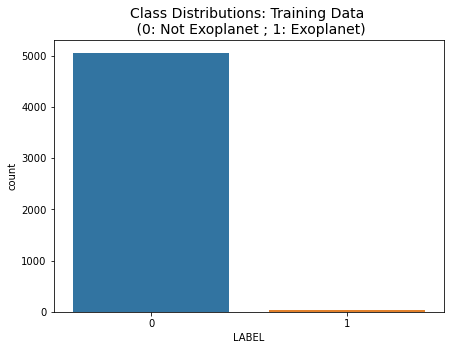

In [22]:
plt.figure(figsize=(7,5))
colors = ["0", "1"]
sns.countplot('LABEL', data=train)
plt.title('Class Distributions: Training Data \n (0: Not Exoplanet ; 1: Exoplanet)', fontsize=14)
# plt.yscale("log")
plt.show()

In [23]:
test["LABEL"].value_counts()

0    565
1      5
Name: LABEL, dtype: int64

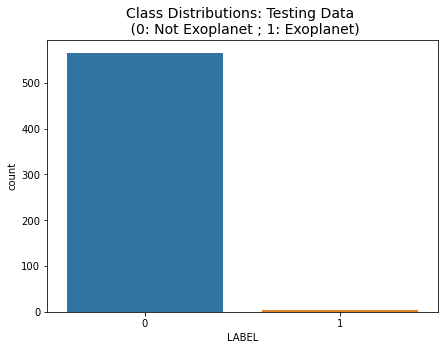

In [24]:
plt.figure(figsize=(7,5))
colors = ["0", "1"]
sns.countplot('LABEL', data=test)
plt.title('Class Distributions: Testing Data \n (0: Not Exoplanet ; 1: Exoplanet)', fontsize=14)
# plt.yscale("log")
plt.show()

Both training and testing data is same. Both have higher number of non-habitable planets.

If a planet is going to be habitable on not, it can be found form its position in its silar system. Now we will plot the intensity of the flux values.

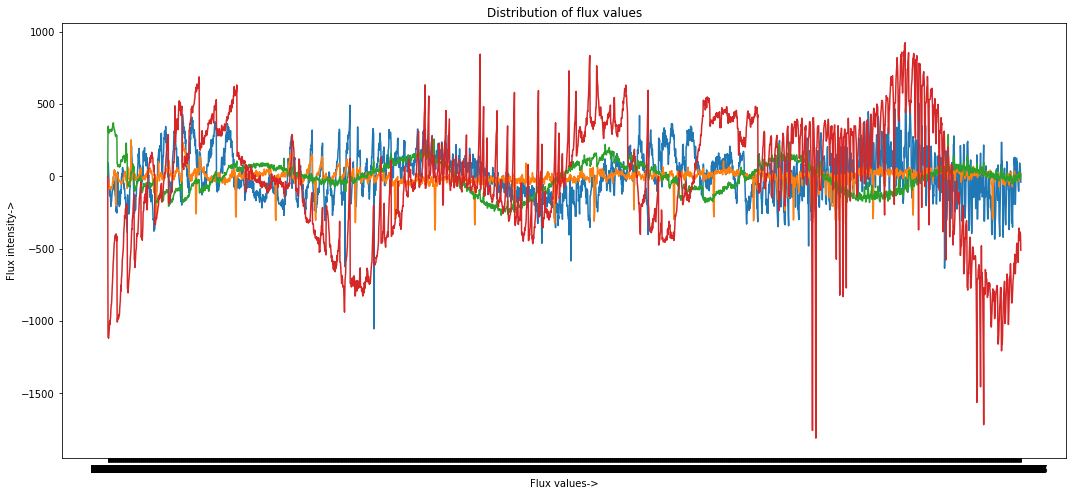

In [25]:

#These planets are habitable exo planets.
plt.figure(figsize=(18,8))
plt.xlabel('Flux values->')
plt.ylabel('Flux intensity->')
plt.title('Distribution of flux values')
plt.plot(train.iloc[0,])
plt.plot(train.iloc[1,])
plt.plot(train.iloc[3,])
plt.plot(train.iloc[4,])
plt.show()

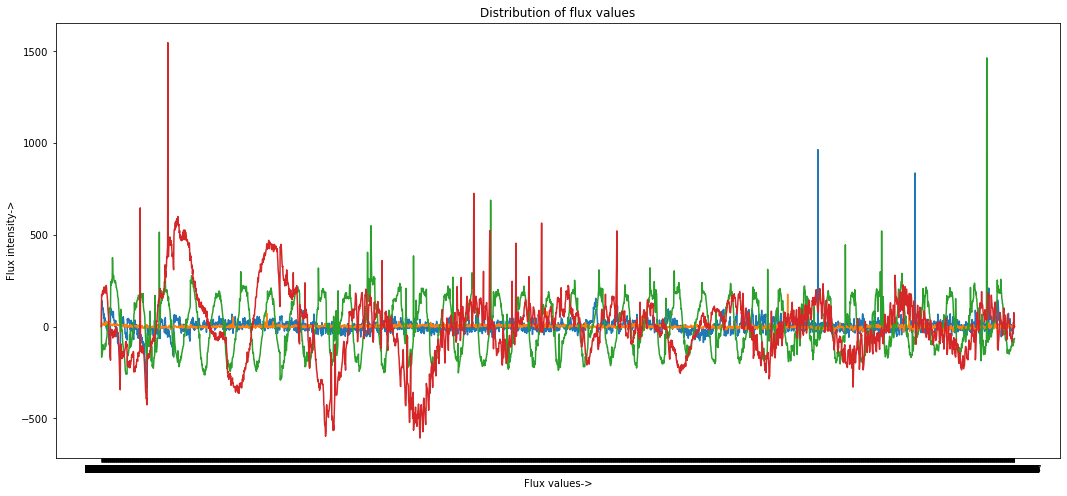

In [26]:

# These planets are non-habitable exo planets.

plt.figure(figsize=(18,8))
plt.xlabel('Flux values->')
plt.ylabel('Flux intensity->')
plt.title('Distribution of flux values')
plt.plot(train.iloc[39,])
plt.plot(train.iloc[43,])
plt.plot(train.iloc[40,])
plt.plot(train.iloc[42,])
#plt.yscale("logit")
plt.show()

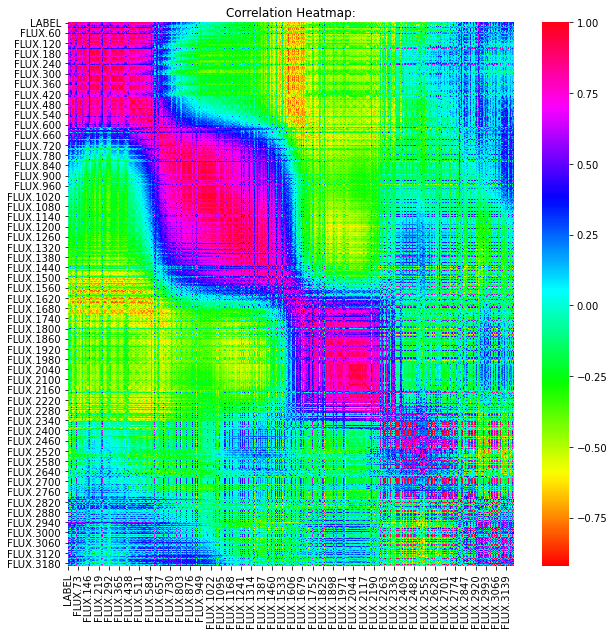

In [27]:
# Heatmap to gain insight about the correlation about the dataset.
plt.figure(figsize = (10,10))
sns.color_palette("viridis", as_cmap=True)
sns.heatmap(train.corr(), cmap = "hsv")
plt.title("Correlation Heatmap:")
plt.show()

#### Outlier Detection

In [28]:
train.describe(include = "all")

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


<AxesSubplot:xlabel='LABEL', ylabel='FLUX.5'>

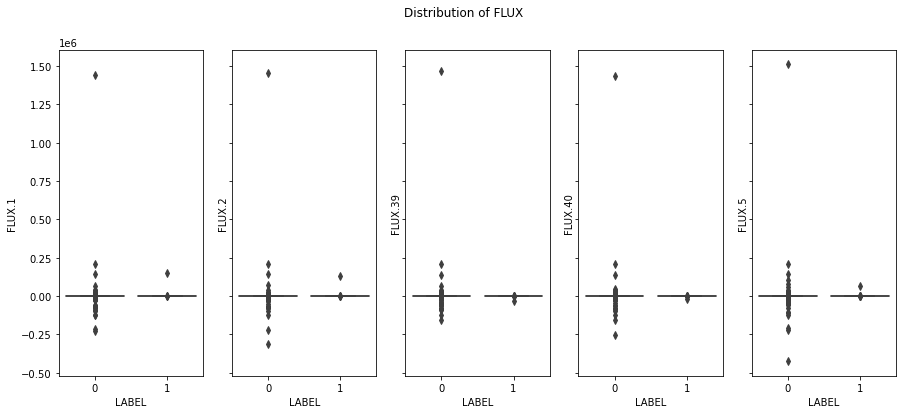

In [29]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')
sns.boxplot(ax=axes[0], data=train, x='LABEL', y='FLUX.1')
sns.boxplot(ax=axes[1], data=train, x='LABEL', y='FLUX.2')
sns.boxplot(ax=axes[2], data=train, x='LABEL', y='FLUX.39')
sns.boxplot(ax=axes[3], data=train, x='LABEL', y='FLUX.40')
sns.boxplot(ax=axes[4], data=train, x='LABEL', y='FLUX.5')

As we can see there many outlier present in the dataset, on every single columns.

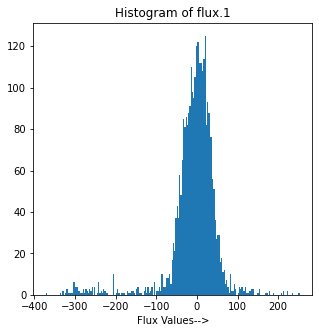

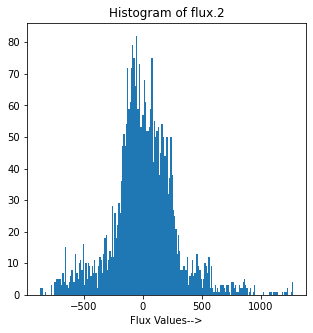

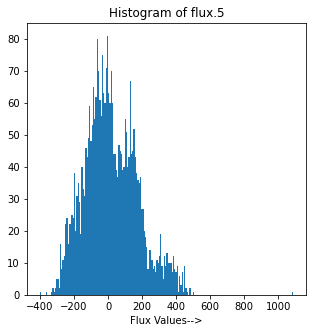

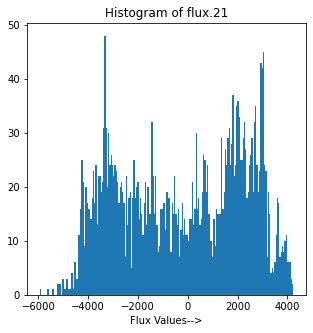

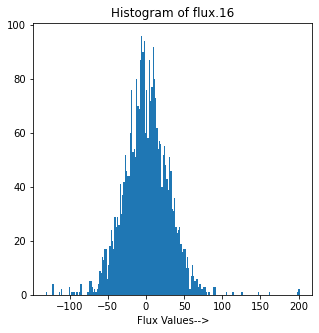

In [30]:
lebels_habitable = [1,2,5,21, 16]
for i in lebels_habitable:
    plt.figure(figsize = (5,5))
    plt.hist(train.iloc[i,:], bins = 200)
    plt.xlabel("Flux Values-->")
    plt.title("Histogram of flux."+ str(i))
    plt.show()

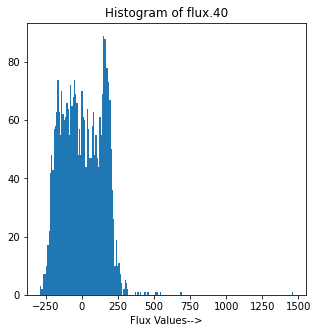

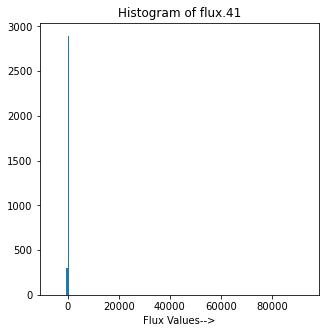

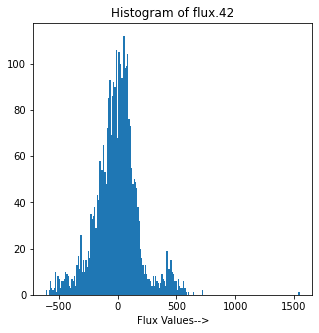

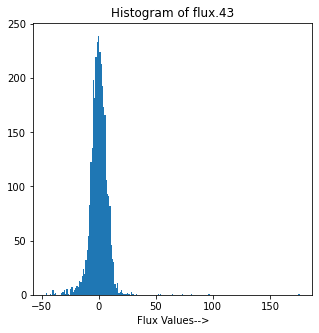

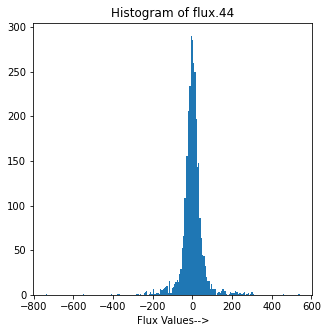

In [31]:
lebels_habitable = [40, 41, 42, 43, 44]
for i in lebels_habitable:
    plt.figure(figsize = (5,5))
    plt.hist(train.iloc[i,:], bins = 200)
    plt.xlabel("Flux Values-->")
    plt.title("Histogram of flux."+ str(i))
    plt.show()

### Spiliting the dataset

In [32]:
# Traing data
x_train = train.drop(["LABEL"], axis = 1)
y_train = train["LABEL"]

# Testing data
x_test = test.drop(["LABEL"], axis = 1)
y_test = test["LABEL"]

In [33]:
x_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [34]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
5082    0
5083    0
5084    0
5085    0
5086    0
Name: LABEL, Length: 5087, dtype: int64

In [35]:
x_test

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,107.28,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,-10.48,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,-14.78,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,-4.36,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


In [36]:
y_test

0      1
1      1
2      1
3      1
4      1
      ..
565    0
566    0
567    0
568    0
569    0
Name: LABEL, Length: 570, dtype: int64

### Data Normalization

In [37]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

### Applying Gaussian Filter

In [38]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

### Feature Scaling

In [39]:
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

## SMOTE: Synthetic Minority Oversampling Technique
Imbalance classification is a type where the dataset consists of large difference between the vales in each class
this imabalnce causes the machine elarning model to ignore these values and have poor results. SMote
stands for ***Synthetic Minority Oversampling Technique*** , whrer the data values of these minority classes are duplicated , so that the model recognises 
these classes . it is a type of data augumentation process where the new data is sinthesized from teh existing onesImbalance classification is a type where the dataset consists of large difference between the vales in each class
this imabalnce causes the machine elarning model to ignore these values and have poor results. SMote
stands for Synthetic Minority Oversampling Technique , whrer the data values of these minority classes are duplicated , so that the model recognises 
these classes . it is a type of data augumentation process where the new data is sinthesized from teh existing ones.  
  **Since the dataset is highly imbalanced we will use this method.**

In [40]:
smote_model = SMOTE()

In [41]:
ovs_x_train, ovs_y_train = smote_model.fit_resample(train.drop(["LABEL"], axis = 1), train["LABEL"])
ovs_y_train = ovs_y_train.astype("int")

In [42]:
# ovs_x_train.value_counts().reset_index().plot(kind = "bar")

In [43]:
ovs_x_train.shape

(10100, 3197)

In [44]:
ovs_y_train.shape

(10100,)

In [45]:
ovs_y_train.unique()

array([1, 0])

### Train-Test Spliting

In [46]:
X_train_ovs, X_test_ovs, y_train_ovs, y_test_ovs = train_test_split(ovs_x_train, ovs_y_train, test_size = 0.25, random_state = 7)

In [47]:
print("Shape of oversampled X_train: ", X_train_ovs.shape)
print("Shape of oversampled y_train: ", y_train_ovs.shape)
print("Shape of oversampled X_test: ", X_test_ovs.shape)
print("Shape of oversampled y_test: ", y_test_ovs.shape)

Shape of oversampled X_train:  (7575, 3197)
Shape of oversampled y_train:  (7575,)
Shape of oversampled X_test:  (2525, 3197)
Shape of oversampled y_test:  (2525,)


# 🛠 Model Building 

# ✅ CNN model
***Architecture of the Convolutiuonal Network:***
* Reshape Layer, Input layer;
* 1D convolutional layer, consisting of 10, 3x3 filters, L2 regularization and RELU activation function;
* 1D max pooling layer, window size - 2x2, stride - 2;
* Dropout(20%);
* Fully connected layer with 48 neurons and RELU activation function;
* Dropout(20%);
* Fully connected layer with 18 neurons and RELU activation function;
* Output layer with sigmoid activation function.

In [48]:
tf.random.set_seed(5)
# Shuffeling the Dataset
X_train_ovs, y_train_ovs = shuffle(X_train_ovs, y_train_ovs)
n_features = x_train.shape[1]

# Acrhitecture
cnn_model = keras.models.Sequential([
    keras.layers.Reshape((n_features, 1), input_shape = (n_features,)),
    keras.layers.Conv1D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (n_features, 1), kernel_regularizer = "l2"),
    keras.layers.MaxPooling1D(pool_size = 2, strides = 2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid") # For binary classification
])

# Model Compile 
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.001, decay_steps = 10000, decay_rate = 0.9
)

cnn_model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(lr_schedule),
    metrics = ["accuracy"])

In [49]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3197, 1)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 3195, 10)          40        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1597, 10)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1597, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 15970)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                798550    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0

In [50]:
import pydot
keras.utils.plot_model(cnn_model, to_file = "CNN Model.png",
                      show_shapes = False, show_layer_names = True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [51]:
# Creating the early checkpoint with best Weights & Bias
early_checkpoint = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                patience = 7,
                                                restore_best_weights = True)


# Fitting the model
history_cnn = cnn_model.fit(X_train_ovs, y_train_ovs,
                           validation_split = 0.2,
                           batch_size = 128,
                           callbacks = [early_checkpoint],
                           epochs = 30,
                           verbose = 1)

Epoch 1/30
48/48 [==============================] - 5s 38ms/step - loss: 42.2091 - accuracy: 0.6741 - val_loss: 3.3240 - val_accuracy: 0.9538
Epoch 2/30
48/48 [==============================] - 1s 14ms/step - loss: 5.5969 - accuracy: 0.9185 - val_loss: 0.0998 - val_accuracy: 0.9947
Epoch 3/30
48/48 [==============================] - 1s 15ms/step - loss: 3.2916 - accuracy: 0.9482 - val_loss: 0.2459 - val_accuracy: 0.9815
Epoch 4/30
48/48 [==============================] - 1s 15ms/step - loss: 25.3021 - accuracy: 0.8801 - val_loss: 4.3394 - val_accuracy: 0.9901
Epoch 5/30
48/48 [==============================] - 1s 15ms/step - loss: 28.6784 - accuracy: 0.9480 - val_loss: 1.8241 - val_accuracy: 0.9908
Epoch 6/30
48/48 [==============================] - 1s 15ms/step - loss: 0.7926 - accuracy: 0.9807 - val_loss: 0.8390 - val_accuracy: 0.9934
Epoch 7/30
48/48 [==============================] - 1s 15ms/step - loss: 1.1467 - accuracy: 0.9846 - val_loss: 0.4625 - val_accuracy: 0.9927
Epoch 8/30

In [52]:
# Model Evaluation: Training Accuracy
_, train_acc = cnn_model.evaluate(X_train_ovs, y_train_ovs)

237/237 [==============================] - 1s 4ms/step - loss: 0.4591 - accuracy: 0.9951


In [53]:
# Model Evaluation: Test Accuracy
_, test_acc = cnn_model.evaluate(X_test_ovs, y_test_ovs)

79/79 [==============================] - 1s 7ms/step - loss: 0.3160 - accuracy: 0.9937


In [54]:
# Predictions
y_class_pred = (cnn_model.predict(X_test_ovs)>0.5).astype("int32")
y_pred = cnn_model.predict(X_test_ovs)

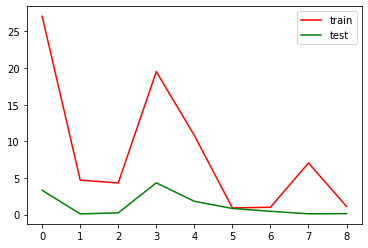

In [55]:
# Accuracy History
plt.plot(history_cnn.history["loss"], label = "train", color = "red")
plt.plot(history_cnn.history["val_loss"], label = "test", color = "green")
plt.legend()

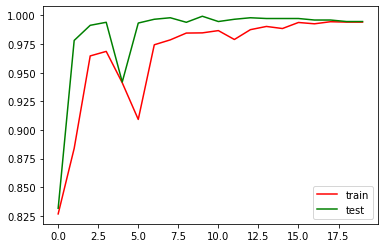

In [93]:
# Accuracy History
plt.plot(history_cnn.history["accuracy"], label = "train", color = "red")
plt.plot(history_cnn.history["val_accuracy"], label = "test", color = "green")
plt.legend()

Text(0.5, 1.0, 'CONFUSION MATRIX')

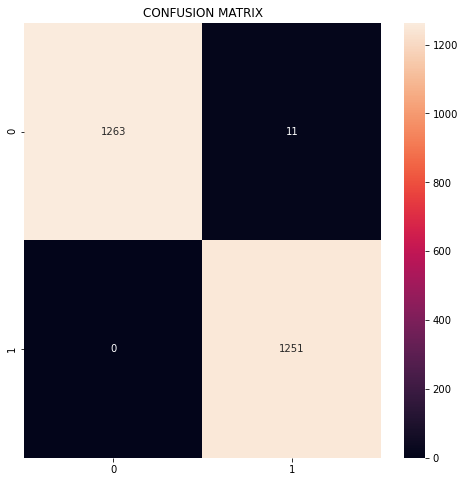

In [94]:
# Confussion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test_ovs, y_class_pred),annot=True,fmt = "d")
plt.title("CONFUSION MATRIX") # CNN

In [95]:
# Other prediction matrics
print("Other prediction matrics:")
print("Accuracy: ","{:0.3f}".format(accuracy_score(y_test_ovs, y_class_pred)*100))
print("Precision: ", "{:0.3f}".format(precision_score(y_test_ovs, y_class_pred)*100))
print("Recall: ", "{:0.3f}".format(recall_score(y_test_ovs, y_class_pred)*100))
print("F1 Score:", "{:0.3f}".format(f1_score(y_test_ovs, y_class_pred)*100))

Other prediction matrics:
Accuracy:  99.564
Precision:  99.128
Recall:  100.000
F1 Score: 99.562


In [96]:
# Classification report
print(classification_report(y_test_ovs, y_class_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1274
           1       0.99      1.00      1.00      1251

    accuracy                           1.00      2525
   macro avg       1.00      1.00      1.00      2525
weighted avg       1.00      1.00      1.00      2525



In [98]:
# cnn_model.save('cnn_model_exo.h5')

# ✅ XGboost

#### XGboost stands for Extreme Boosting. It is a boosting algorithm which is based on Ensemble Learning Technique. It provides a wrapper class that allows models to be treated as classifiers or regressors.
#### The overall parameters that are to be judged:
#### 1. General Paramaters
#### 2. Booster Parameters
#### 3. Learning Task Parameters
### Basically, there are two types of boosters, but in this case we are using Tree booster because it always outperforms the linear booster

In [25]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(use_label_encoder = False)

xg_model.fit(X_train_ovs,y_train_ovs)
y_pred_xgb_ovs = xg_model.predict(X_test_ovs)
print('Validation accuracy of XGB is', accuracy_score(y_pred_xgb_ovs,y_test_ovs))
print("\nClassification report:\n",(classification_report(y_test_ovs,y_pred_xgb_ovs)))

[15:20:15] WARNING: ../src/learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Validation accuracy of XGB is 0.9992079207920792

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1251

    accuracy                           1.00      2525
   macro avg       1.00      1.00      1.00      2525
weighted avg       1.00      1.00      1.00      2525



Text(0.5, 1.0, 'CONFUSION MATRIX')

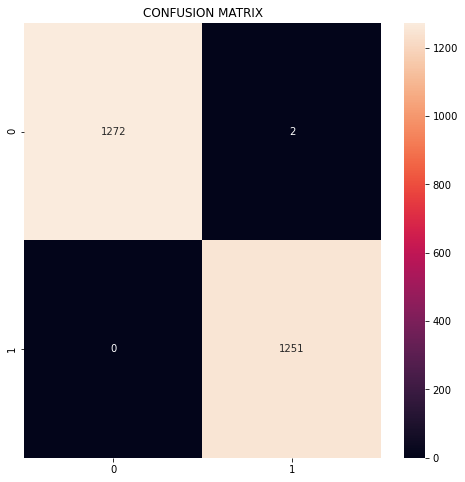

In [26]:
# Confussion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test_ovs, y_pred_xgb_ovs),annot=True,fmt = "d")
plt.title("CONFUSION MATRIX")

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

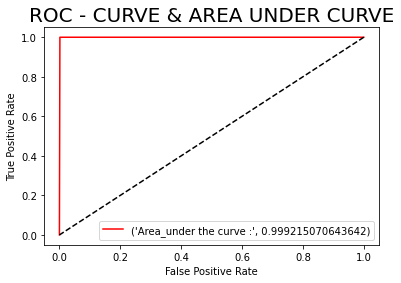

In [29]:
# ROC and AUC
predicting_probabilites = xg_model.predict_proba(X_test_ovs)[:,1]
fpr,tpr,thresholds = roc_curve(y_test_ovs,y_pred_xgb_ovs)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [49]:
XG_acc = accuracy_score(y_pred_xgb_ovs,y_test_ovs)

In [27]:
import pickle

In [28]:
with open('XG_boost_not_label_enc', 'wb') as f:
    pickle.dump(xg_model, f)

# ✅K-nn
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [30]:
knn_model_ovs = KNeighborsClassifier()
knn_model_ovs.fit(X_train_ovs, y_train_ovs)
knn_model_ovs_prediction = knn_model_ovs.predict(X_test_ovs)
knn_ovs_acc = accuracy_score(knn_model_ovs_prediction, y_test_ovs)

In [31]:
knn_ovs_acc

0.9849504950495049

In [32]:
# Classification Report
print(classification_report(y_test_ovs, knn_model_ovs_prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1274
           1       0.97      1.00      0.99      1251

    accuracy                           0.98      2525
   macro avg       0.99      0.99      0.98      2525
weighted avg       0.99      0.98      0.98      2525



Text(0.5, 1.0, 'CONFUSION MATRIX')

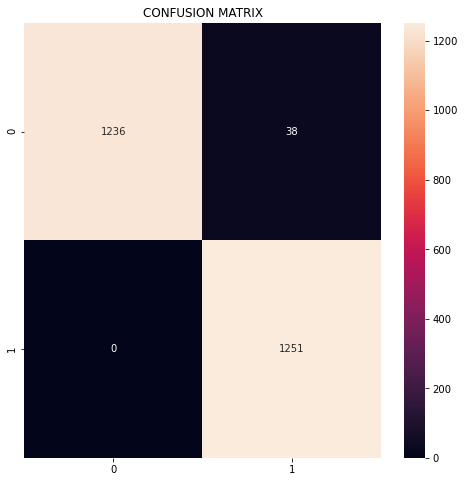

In [33]:
# Confussion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test_ovs, knn_model_ovs_prediction),annot=True,fmt = "d")
plt.title("CONFUSION MATRIX")

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

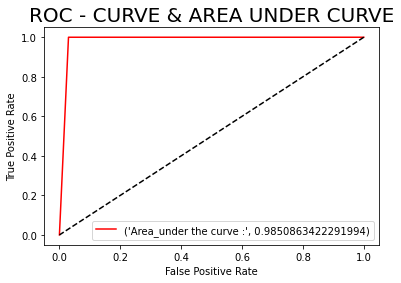

In [34]:
# ROC and AUC
predicting_probabilites = knn_model_ovs.predict_proba(X_test_ovs)[:,1]
fpr,tpr,thresholds = roc_curve(y_test_ovs,knn_model_ovs_prediction)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [35]:
with open('KNN_model', 'wb') as f:
    pickle.dump(knn_model_ovs, f)

# Random Forest:

In [36]:
rf_model = RandomForestClassifier(max_depth = 5, random_state = 7, verbose = 1)
rf_model.fit(X_train_ovs, y_train_ovs)
prediction_rf = rf_model.predict(X_test_ovs)
acc_rf = accuracy_score(prediction_rf, y_test_ovs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [37]:
print(acc_rf)

0.9944554455445545


Text(0.5, 1.0, 'CONFUSION MATRIX')

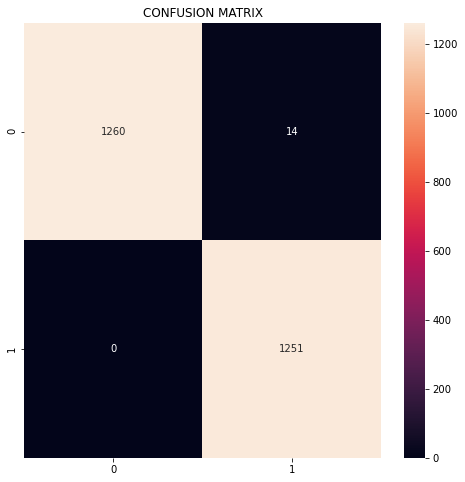

In [38]:
# Confussion Matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test_ovs,prediction_rf),annot=True,fmt = "d")
plt.title("CONFUSION MATRIX")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

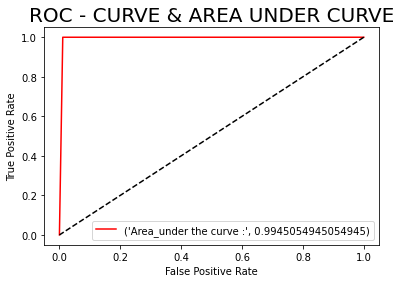

In [39]:
# ROC and AUC
predicting_probabilites = rf_model.predict_proba(X_test_ovs)[:,1]
fpr,tpr,thresholds = roc_curve(y_test_ovs,prediction_rf)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [40]:
print(classification_report(y_test_ovs, prediction_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1274
           1       0.99      1.00      0.99      1251

    accuracy                           0.99      2525
   macro avg       0.99      0.99      0.99      2525
weighted avg       0.99      0.99      0.99      2525



In [41]:
with open('RF_model', 'wb') as f:
    pickle.dump(rf_model, f)

# Decision Tree
A Decision Tree is constructed by asking a serious of questions with respect to a record of the dataset we have got. Each time an answer is received, a follow-up question is asked until a conclusion about the class label of the record. The series of questions and their possible answers can be organised in the form of a decision tree, which is a hierarchical structure consisting of nodes and directed edges.
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [42]:
dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 7)
dt_model.fit(X_train_ovs, y_train_ovs)
prediction_dt = dt_model.predict(X_test_ovs)

In [43]:
acc_dt = accuracy_score(prediction_dt, y_test_ovs)
acc_dt

0.9314851485148515

In [44]:
print(classification_report(y_test_ovs, prediction_dt))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1274
           1       0.89      0.98      0.93      1251

    accuracy                           0.93      2525
   macro avg       0.93      0.93      0.93      2525
weighted avg       0.94      0.93      0.93      2525



Text(0.5, 1.0, 'CONFUSION MATRIX')

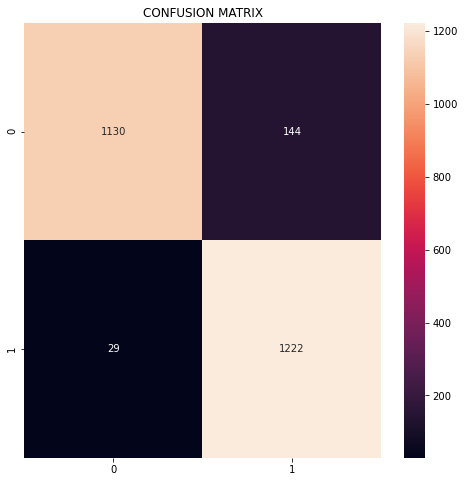

In [45]:
# Confussion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test_ovs,prediction_dt),annot=True,fmt = "d")
plt.title("CONFUSION MATRIX")

Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

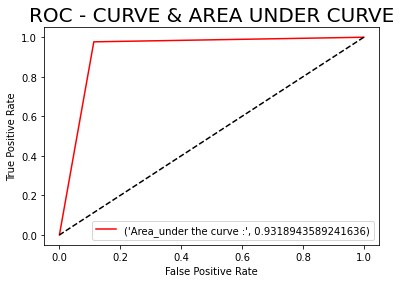

In [46]:
# ROC and AUC
predicting_probabilites = dt_model.predict_proba(X_test_ovs)[:,1]
fpr,tpr,thresholds = roc_curve(y_test_ovs,prediction_dt)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [47]:
with open('dt_model', 'wb') as f:
    pickle.dump(dt_model, f)

## Accuracy Comparision

In [115]:
acc_df = pd.DataFrame([acc_dt*100, acc_rf*100, knn_ovs_acc*100,  XG_acc*100])
acc_df

,0
0,93.148515
1,99.445545
2,98.495050
3,99.920792


In [116]:
acc_df

,0
0,93.148515
1,99.445545
2,98.495050
3,99.920792


<AxesSubplot:>

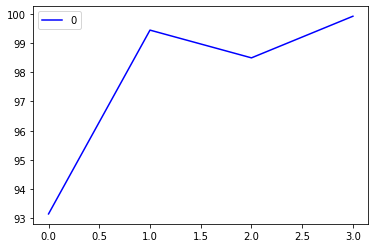

In [117]:
acc_df.plot(color = "b")

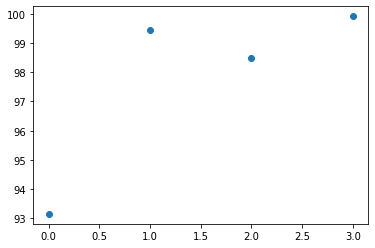

In [118]:
plt.plot(acc_df,"o")

# AutoML⚡⚡⚡:

In [22]:
# Finding Best model, according to accuracy
automl_auc = AutoMLSearch(X_train=X_train_ovs, y_train=y_train_ovs,
                          problem_type = 'binary',
                          objective = 'accuracy binary',
                          additional_objectives=['f1','precision'],
                          max_batches = 1,
                          optimize_thresholds = True)
automl_auc.search()

Generating pipelines to search over...

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Accuracy Binary. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: extra_trees, xgboost, lightgbm, random_forest, decision_tree, linear_model, catboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Accuracy Binary: 0.502

*****************************
* Evaluating Batch Number 1 *
*****************************

Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Accuracy Binary: 0.913
Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Accuracy Binary: 0.818
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Accuracy Binary: 0.967
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Accuracy Binary: 0.996
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Accuracy Binary: 0.999
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Accuracy Binary: 0

In [24]:
(automl_auc.rankings)

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,5,LightGBM Classifier w/ Imputer,0.999340,0.000229,0.999208,49.782178,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,6,XGBoost Classifier w/ Imputer,0.998944,0.000605,0.998812,49.742574,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,4,Random Forest Classifier w/ Imputer,0.996436,0.000686,0.996832,49.491749,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,3,CatBoost Classifier w/ Imputer,0.967129,0.001584,0.967129,46.561056,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,8,Logistic Regression Classifier w/ Imputer + St...,0.953531,0.004791,0.955248,45.201320,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,1,Decision Tree Classifier w/ Imputer,0.913267,0.004410,0.908515,41.174917,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,2,Extra Trees Classifier w/ Imputer,0.817690,0.023687,0.838812,31.617162,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,0,Mode Baseline Binary Classification Pipeline,0.501518,0.000229,0.501386,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}
8,7,Elastic Net Classifier w/ Imputer + Standard S...,0.501518,0.000229,0.501386,0.000000,False,{'Imputer': {'categorical_impute_strategy': 'm...


In [26]:
print(automl_auc.best_pipeline) # printing the best model

LightGBM Classifier w/ Imputer


In [28]:
best_pipeline = automl_auc.best_pipeline # Selecting the bestpipeline as our default model

In [29]:
# Running LightGBM 
best_pipeline.score(X_test_ovs, y_test_ovs, objectives=["accuracy binary","auc","f1","Precision","Recall"])

OrderedDict([('Accuracy Binary', 0.9996039603960396),
             ('AUC', 0.9999993725584682),
             ('F1', 0.9996001599360256),
             ('Precision', 1.0),
             ('Recall', 0.9992006394884093)])